In [32]:
import pandas as pd
import numpy as np
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [3]:
# get info:
df=pd.read_csv('df_all_stat.csv')

In [4]:
#STEP ONE: CLEAN

In [5]:
df1=df.copy()

In [10]:
dfA=df.copy()

In [7]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df1['Bathroom']=df1['Baths']+df1['Half_Bath_(F)']

In [12]:
df1.sum(axis=0)

URL                         https://www.elliman.com/newyorkcity/sales/deta...
Property_Type               Single Family HomeSingle Family HomeSingle Fam...
MLS/Listing_ID              3252464319120432267763220866322581132372443239...
Full_Street_Address         147-12 3rd Avenue138-34 10th Avenue2-43 150th ...
Neighborhood                WhitestoneWhitestoneWhitestoneWhitestoneWhites...
ZipCode                                                           1.46373e+07
Price                                                             1.21721e+09
Description                 Click for NYS Housing Discrimination Disclosur...
Dishwasher                                                                  0
beds                                                                     5382
Baths                                                                    3069
Interior                    3,000 \n\t\t\t\tSq Ft.2,800 \n\t\t\t\tSq Ft.3,...
Year_Built                                                      

In [19]:
df_y=df1['Price'].reset_index().copy()
df_X=df1[['beds', 'Year_Built', 'Bathroom', 'Patio', 'Air_Conditioning', 'Garage_-_Attached', 'Brick', 'Vinyl_(F)', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone']].copy()
df2=df1[['Price', 'beds','Year_Built', 'Bathroom', 'Patio', 'Air_Conditioning', 'Garage_-_Attached', 'Brick', 'Vinyl_(F)', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone']].copy()
                          
                          

In [24]:
df2.corr()

,Price,beds,Year_Built,Bathroom,Patio,Air_Conditioning,Garage_-_Attached,Brick,Vinyl_(F),Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone
Price,1.000000,0.402460,0.297136,0.591069,0.126524,0.128515,0.196999,0.227525,-0.092264,0.630408,0.387505,0.556748,0.618925,-0.249140,-0.268254
beds,0.402460,1.000000,0.236975,0.626246,-0.066010,-0.094894,-0.007516,0.008049,-0.016635,0.554850,0.160270,0.152211,0.104993,-0.051031,-0.090366
Year_Built,0.297136,0.236975,1.000000,0.400404,-0.009970,0.101310,0.217963,0.299488,-0.063479,0.313898,0.114400,0.082822,0.111912,0.092571,0.100290
Bathroom,0.591069,0.626246,0.400404,1.000000,0.060903,0.025091,0.091501,0.128270,0.004886,0.622816,0.269965,0.257807,0.246646,-0.065541,-0.071575
Patio,0.126524,-0.066010,-0.009970,0.060903,1.000000,0.201860,0.142653,0.093619,0.049659,0.101483,0.077829,0.172313,0.194744,-0.073710,-0.059138
Air_Conditioning,0.128515,-0.094894,0.101310,0.025091,0.201860,1.000000,0.073355,0.075221,0.005712,0.007202,0.136201,0.121765,0.133891,0.008126,0.031517
Garage_-_Attached,0.196999,-0.007516,0.217963,0.091501,0.142653,0.073355,1.000000,0.274418,-0.070722,0.168468,0.075931,0.225543,0.231100,-0.095941,-0.073236
Brick,0.227525,0.008049,0.299488,0.128270,0.093619,0.075221,0.274418,1.000000,-0.166531,0.161672,-0.009394,0.265760,0.219496,-0.167592,-0.173308
Vinyl_(F),-0.092264,-0.016635,-0.063479,0.004886,0.049659,0.005712,-0.070722,-0.166531,1.000000,-0.060641,-0.005745,-0.138780,-0.120457,0.112470,0.118640
Interior_Sq_Ft,0.630408,0.554850,0.313898,0.622816,0.101483,0.007202,0.168468,0.161672,-0.060641,1.000000,0.378286,0.263152,0.275558,-0.085720,-0.088126


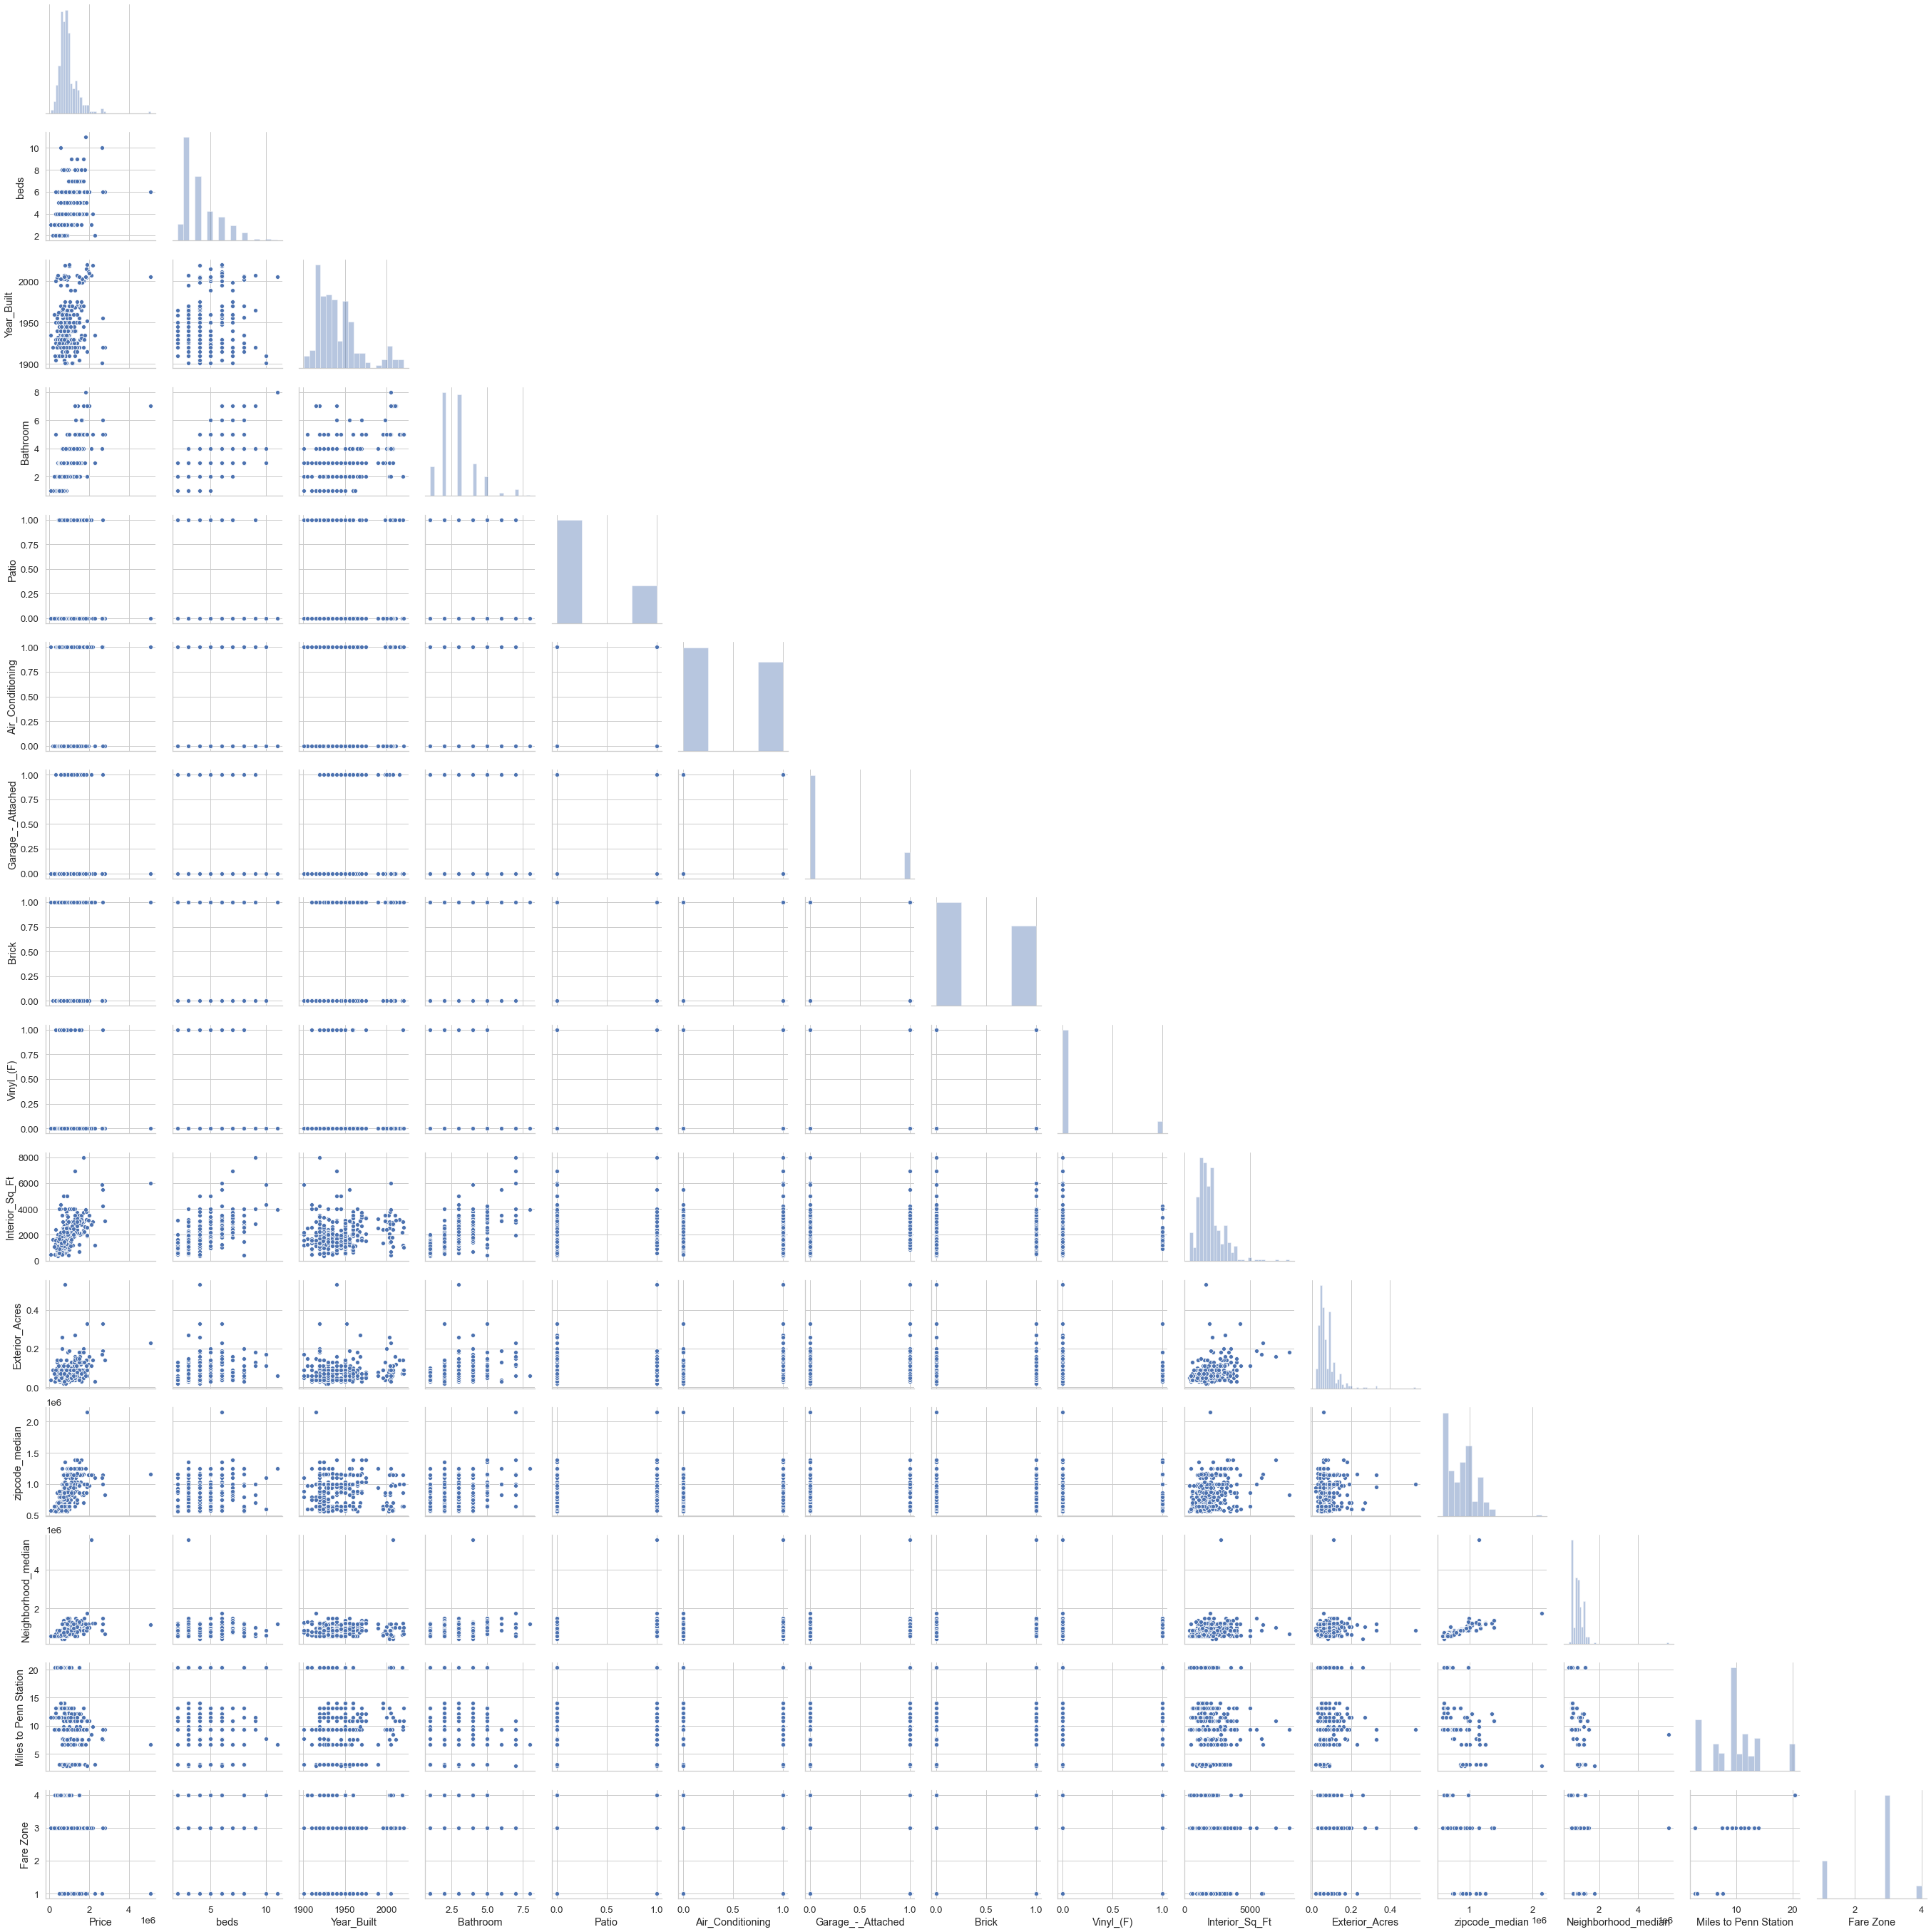

In [35]:
%config InlineBackend.figure_formats = ['png']

g = sns.PairGrid(df2.sample(frac=0.3), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

In [38]:
#Run Simple linear regression

df_lin_X=df_X.copy()
df_lin_y=df2['Price'].copy()
df_lin=df2.copy()

lr = LinearRegression()
fit = lr.fit(df_lin_X, df_lin_y)
print(lr.score(df_lin_X, df_lin_y))    

0.693799439286751


In [47]:
#Train simple linear regression against testing

from sklearn.model_selection import cross_validate

def cv_results(X, y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip(X.columns, final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}')


## Lots of overfitting occuring per linear regression analysis below:

In [48]:
df_lin_X=df_X.copy()
df_lin_y=df2['Price'].copy()
df_lin=df2.copy()

cv_results(df_lin_X, df_lin_y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.4321	Range = (-0.0278, 0.6264)
Train/Test r2 Ratio :   Mean = -4.0007	Range = (-25.2899, 1.8139)


Test Scores: [ 0.62640696  0.59014008  0.5847681   0.38714997 -0.02781025]
Train Scores: [0.68312346 0.70025407 0.69907071 0.70226339 0.70331868]

Best Model Feature coefficient results:
beds:            10095.30
Year_Built:      566.74
Bathroom:        116659.31
Patio:           -47617.62
Air_Conditioning: 56278.20
Garage_-_Attached: 13430.62
Brick:           51616.49
Vinyl_(F):       2376.56
Interior_Sq_Ft:  112.39
Exterior_Acres:  1272619.43
zipcode_median:  0.52
Neighborhood_median: 0.48
Miles to Penn Station: 8007.94
Fare Zone:       -74933.01


## OLS CHECK

In [42]:
#OLS check for results

df_lin_X=df_X.copy()
df_lin_y=df2['Price'].copy()
df_lin=df2.copy()

#Create the model
model = sm.OLS(df_lin_y, sm.add_constant(df_lin_X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     205.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.40e-313
Time:                        00:05:45   Log-Likelihood:                -18078.
No. Observations:                1283   AIC:                         3.619e+04
Df Residuals:                    1268   BIC:                         3.626e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.469e+06   7.38e+05     -3.346      0.001   -3.92e+06   -1.02e+06
beds                   3480.9735   7546.732      0.461      0.645   -1.13e+04    1.83e+04
Year_Built             1012.7243    386.828      2.618      0.009     253.831    1771.617
Bathroom               1.048e+05   1.06e+04      9.853      0.000    8.39e+04    1.26e+05
Patio                 -3.459e+04   2.13e+04     -1.625      0.104   -7.63e+04    7174.386
Air_Conditioning       4.844e+04   1.89e+04      2.556      0.011    1.13e+04    8.56e+04
Garage_-_Attached     -1.208e+04   2.44e+04     -0.496      0.620   -5.99e+04    3.57e+04
Brick                  2.831e+04   2.04e+04      1.386      0.166   -1.18e+04    6.84e+04
Vinyl_(F)             -3786.3677   2.91e+04     -0.130      0.897    -6.1e+04    5.34e+04
Interior_Sq_Ft          154.2665     12.725     12.123      0.000     129.303     179.230
Exterior_Acres         1.877e+06   1.94e+05      9.654      0.000     1.5e+06    2.26e+06
zipcode_median            0.2545      0.062      4.077      0.000       0.132       0.377
Neighborhood_median       0.6668      0.044     15.041      0.000       0.580       0.754
Miles to Penn Station  6064.2984   3513.765      1.726      0.085    -829.133     1.3e+04
Fare Zone             -7.588e+04    1.7e+04     -4.462      0.000   -1.09e+05   -4.25e+04
==============================================================================
Omnibus:                      816.660   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37807.978
Skew:                           2.305   Prob(JB):                         0.00
Kurtosis:                      29.191   Cond. No.                     1.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RUN RIDGE ANALYSIS TO SEE WHICH FACTORS ARE IMPORTANT

In [53]:
from sklearn.linear_model import RidgeCV
df_ridge_X=df_X.copy()
df_ridge_y=df2['Price'].copy()
df_ridge=df2.copy()

clf = RidgeCV(normalize=True, cv=5, scoring='r2').fit(df_ridge_X, df_ridge_y)
clf.score(df_ridge_X, df_ridge_y)
clf.get_params()
clf.coef_

TypeError: 'RidgeCV' object is not subscriptable

## CONTINUED OVERFITTING:

In [54]:
cv_results(df_ridge_X, df_ridge_y, model=RidgeCV(normalize=True))

Test r2 :               Mean = 0.4664	Range = (0.0892, 0.6187)
Train/Test r2 Ratio :   Mean = 2.5831	Range = (1.1013, 7.8492)


Test Scores: [0.61868222 0.58165608 0.61334736 0.42929486 0.08923026]
Train Scores: [0.68132907 0.69748635 0.69629434 0.70013073 0.700382  ]

Best Model Feature coefficient results:
beds:            17131.46
Year_Built:      716.82
Bathroom:        104247.15
Patio:           -35679.62
Air_Conditioning: 53663.15
Garage_-_Attached: 17263.04
Brick:           52605.88
Vinyl_(F):       -274.41
Interior_Sq_Ft:  105.32
Exterior_Acres:  1224572.61
zipcode_median:  0.49
Neighborhood_median: 0.47
Miles to Penn Station: 3832.82
Fare Zone:       -60041.24


In [56]:
from sklearn.linear_model import LassoCV
df_lasso_X=df_X.copy()
df_lasso_y=df2['Price'].copy()
df_lasso=df2.copy()

cv_results(df_lasso_X, df_lasso_y, model=LassoCV(normalize=True))

Test r2 :               Mean = 0.4523	Range = (-0.021, 0.6217)
Train/Test r2 Ratio :   Mean = -5.7137	Range = (-33.4872, 1.4929)


Test Scores: [ 0.61756172  0.57529461  0.62168528  0.46792875 -0.02100235]
Train Scores: [0.67712501 0.69902314 0.69274678 0.69858568 0.70330989]

Best Model Feature coefficient results:
beds:            0.00
Year_Built:      751.33
Bathroom:        109890.99
Patio:           -0.00
Air_Conditioning: 7996.91
Garage_-_Attached: 0.00
Brick:           0.00
Vinyl_(F):       -0.00
Interior_Sq_Ft:  134.76
Exterior_Acres:  2091627.57
zipcode_median:  0.24
Neighborhood_median: 0.65
Miles to Penn Station: -0.00
Fare Zone:       -42225.44


# Improvement occured but none seem to be working well. Apply polynomial analysis:

In [70]:
from sklearn.preprocessing import PolynomialFeatures

df_poly_X=df_X.copy()
df_poly_y=df2['Price'].copy()
df_poly=df2.copy()

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_X)

lr_full = LinearRegression()
lr_full.fit(X_poly, df_poly_y)
lr_full.score(X_poly, df_poly_y)
cv_results(X_poly, df_poly_y, model=RidgeCV(normalize=True))
features = DataFrame(p.transform(data), columns=p.get_feature_names(data.columns))
print features

Test r2 :               Mean = 0.6424	Range = (0.4843, 0.7597)
Train/Test r2 Ratio :   Mean = 1.3278	Range = (1.0684, 1.7147)


Test Scores: [0.75966895 0.68644626 0.64371495 0.63804236 0.48429485]
Train Scores: [0.81165949 0.84930066 0.84186169 0.83652886 0.83040159]

Best Model Feature coefficient results:


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

array([[1.0000e+00, 4.0000e+00, 2.0030e+03, ..., 5.6250e+01, 2.2500e+01,
        9.0000e+00],
       [1.0000e+00, 4.0000e+00, 1.9650e+03, ..., 5.6250e+01, 2.2500e+01,
        9.0000e+00],
       [1.0000e+00, 4.0000e+00, 2.0030e+03, ..., 5.6250e+01, 2.2500e+01,
        9.0000e+00],
       ...,
       [1.0000e+00, 4.0000e+00, 2.0050e+03, ..., 4.1616e+02, 8.1600e+01,
        1.6000e+01],
       [1.0000e+00, 4.0000e+00, 1.9050e+03, ..., 4.1616e+02, 8.1600e+01,
        1.6000e+01],
       [1.0000e+00, 3.0000e+00, 1.9050e+03, ..., 4.1616e+02, 8.1600e+01,
        1.6000e+01]])

In [95]:
from sklearn.model_selection import cross_validate

def poly_cv_results(X, y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    
    Model options: LinearRegression(), LassoCV(), RidgeCV()
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip(p.get_feature_names(df_poly_X.columns), final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}')


In [100]:
df_poly_X=df_X.copy()
df_poly_y=df2['Price'].copy()
df_poly=df2.copy()

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_X)
p.get_feature_names(df_poly_X.columns)
poly_cv_results(X_poly,df_poly_y, LassoCV(normalize=True))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23542338820.90625, tolerance: 21269279969.732464
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25903652415.88672, tolerance: 21269279969.732464
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24929133753.859375, tolerance: 21269279969.732464
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54411606454.0625, tolerance: 34039492049.01294
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56458024244.140625, tolerance: 34039492049.01294
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55138984482.47656, tolerance: 34039492049.01294
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: Co

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30827113271.09375, tolerance: 27321940597.757282
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34789669826.84375, tolerance: 33629564587.092976
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40182979310.09375, tolerance: 33629564587.092976
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525:

Test r2 :               Mean = 0.6565	Range = (0.47, 0.7888)
Train/Test r2 Ratio :   Mean = 1.3118	Range = (1.0371, 1.7747)


Test Scores: [0.78879528 0.69422607 0.66360674 0.66590838 0.46995844]
Train Scores: [0.81806496 0.84099005 0.84288679 0.84282151 0.83403816]

Best Model Feature coefficient results:
1:               0.00
beds:            1635.11
Year_Built:      0.00
Bathroom:        0.00
Patio:           0.00
Air_Conditioning: -0.00
Garage_-_Attached: 0.00
Brick:           -0.00
Vinyl_(F):       0.00
Interior_Sq_Ft:  0.00
Exterior_Acres:  0.00
zipcode_median:  0.00
Neighborhood_median: 0.00
Miles to Penn Station: 0.00
Fare Zone:       37326.27
beds^2:          0.00
beds Year_Built: 0.00
beds Bathroom:   0.00
beds Patio:      1131.73
beds Air_Conditioning: 8295.31
beds Garage_-_Attached: -0.00
beds Brick:      -0.00
beds Vinyl_(F):  0.00
beds Interior_Sq_Ft: 0.00
beds Exterior_Acres: 0.00
beds zipcode_median: 0.00
beds Neighborhood_median: 0.00
beds Miles to Penn Station: 0.00
b

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44875416918.08594, tolerance: 34421069050.483536
  model = cd_fast.enet_coordinate_descent_gram(
